In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import os
import json

In [2]:
main_path = '/home/garg1/logs/pytorch_seed_rl/scaling_experiment_final'

In [3]:
subfolders_paths = [f.path for f in os.scandir(main_path) if f.is_dir()]

In [4]:
rows = []
for path in subfolders_paths:
    name = os.path.basename(path)
    csv_path = os.path.join(path, 'csv', 'system.csv')
    config_path = os.path.join(path, 'config.json')
    with open(config_path) as file:
        config = json.load(file)
    df = pd.read_csv(csv_path)
    last_row = df.iloc[-10][['runtime', 'inference_steps', 'training_steps']].copy()
    last_row['i_fps'] = int(last_row['inference_steps'] / last_row['runtime'])
    last_row['t_fps'] = int(last_row['training_steps'] / last_row['runtime'])
    
    last_row = last_row[['runtime', 'training_steps', 'i_fps', 't_fps']]
    
    last_row['actors'] = config['num_actors']
    last_row['exp_name'] = name
    last_row['envs'] = config['num_envs']
    last_row['prefetchers'] = config['threads_prefetch']
    last_row['inferencers'] = config['threads_inference']
    last_row['storers'] = config['threads_store']
    last_row['used_gpus'] = 1
    last_row['total_envs'] = config['num_actors']*config['num_envs']
    last_row['setup'] = '%s actors, %s envs, %s prefetchers, %s inferencers, %s storers'%(str(int(last_row['actors'])).zfill(2), 
                                                              str(int(last_row['envs'])).zfill(2), 
                                                              str(int(last_row['prefetchers'])).zfill(1), 
                                                              str(int(last_row['inferencers'])).zfill(1), 
                                                              str(int(last_row['storers'])).zfill(2)
                                                                             )
    
    rows.append(last_row)
df = pd.DataFrame(rows)

In [5]:
df = df.sort_values('t_fps', ascending=False)

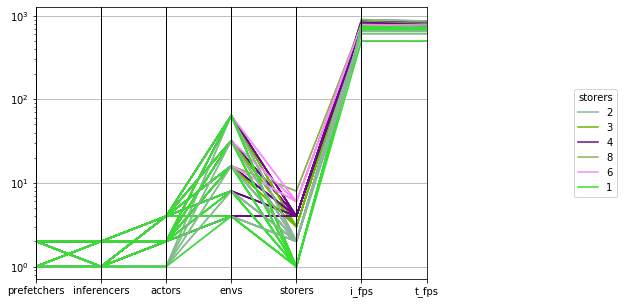

In [6]:
plt.figure(figsize=(7,5))
#cmap = cm.get_cmap('jet') # Colour map (there are many others)
pd.plotting.parallel_coordinates(df, 'storers',
                                 	['prefetchers',
                                     'inferencers',
                                     'actors',
                                     'envs',
                                     'storers',
                                     'i_fps',
                                     't_fps'],
                                #colormap=cmap
                                )
plt.yscale('log') 
plt.legend(title='storers',
           loc='center right',
           bbox_to_anchor=(1.5, 0.5))
plt.savefig('scaling.pdf')

In [7]:
#df.sort_values('training_steps')
df.sort_values('i_fps', ascending=False)

,runtime,training_steps,i_fps,t_fps,actors,exp_name,envs,prefetchers,inferencers,storers,used_gpus,total_envs,setup
646,228.228856,197120.0,902.0,863.0,4.0,a_04_p_2_i_1_n_64_s_02,64,2,1,2,1,256,"04 actors, 64 envs, 2 prefetchers, 1 inference..."
646,228.633295,197120.0,900.0,862.0,4.0,a_04_p_1_i_1_n_64_s_02,64,1,1,2,1,256,"04 actors, 64 envs, 1 prefetchers, 1 inference..."
636,230.168175,197120.0,893.0,856.0,4.0,a_04_p_1_i_1_n_32_s_02,32,1,1,2,1,128,"04 actors, 32 envs, 1 prefetchers, 1 inference..."
636,230.791656,197120.0,891.0,854.0,2.0,a_02_p_1_i_1_n_64_s_02,64,1,1,2,1,128,"02 actors, 64 envs, 1 prefetchers, 1 inference..."
636,231.182988,197120.0,890.0,852.0,2.0,a_02_p_2_i_1_n_64_s_02,64,2,1,2,1,128,"02 actors, 64 envs, 2 prefetchers, 1 inference..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,303.465938,197120.0,650.0,649.0,1.0,a_01_p_1_i_1_n_32_s_02,32,1,1,2,1,32,"01 actors, 32 envs, 1 prefetchers, 1 inference..."
615,321.990573,197120.0,612.0,612.0,1.0,a_01_p_1_i_1_n_08_s_01,8,1,1,1,1,8,"01 actors, 08 envs, 1 prefetchers, 1 inference..."
615,324.841758,197120.0,606.0,606.0,1.0,a_01_p_1_i_1_n_08_s_02,8,1,1,2,1,8,"01 actors, 08 envs, 1 prefetchers, 1 inference..."
615,394.320200,197120.0,500.0,499.0,1.0,a_01_p_1_i_1_n_04_s_02,4,1,1,2,1,4,"01 actors, 04 envs, 1 prefetchers, 1 inference..."


In [8]:
df.to_csv('scaling_data_system2.csv')